In [123]:
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

$V = \frac{1}{2}x^2 - x^4 +\frac{1}{8}x^8$

In [146]:
K = 12
d = 8
a = np.zeros(d + 1)
a[2], a[4], a[8] = 1/2, -1, 1/8

In [150]:
vars = cp.Variable((2 * K - 1), name='x')
E = cp.Parameter(nonneg=True)
constraints = [vars[0] == 1]
for i in range(1,2*K-1,2):
    constraints += [vars[i] == 0]
m = 0
while d + m <= 2 * K - 2:
    t = 4 * (m+1) * E * vars[m]
    if m >= 2:
        t = t + m * (m * m - 1) * vars[m - 2]
    for n in range(1, d):
        t = t - 2 * (n + 2 * m + 2) * a[n] * vars[n + m]
    t = t / (2 * a[d] * (d + 2 * m + 2))
    constraints += [vars[d + m] == t]
    m += 1
v1 = np.zeros(K)
v2 = np.zeros(K)
M = 0
for i in range(2*K - 1):
    if i<K:
        v1[i] = 1
    else:
        v2[i - K + 1] = 1
    M = M + vars[i] * sp.linalg.hankel(v1, v2)
    if i<K:
        v1[i] = 0
    else:
        v2[i - K + 1] = 0
objective = cp.Maximize(cp.lambda_min(M))
prob = cp.Problem(objective, constraints)

In [151]:
E_vals = np.linspace(0,6,num=200)
t_vals = []
for val in E_vals:
    E.value = val
    try:
        prob.solve(solver=cp.CLARABEL)
        t_vals.append(prob.value)
    except cp.SolverError:
        t_vals.append(-np.inf)

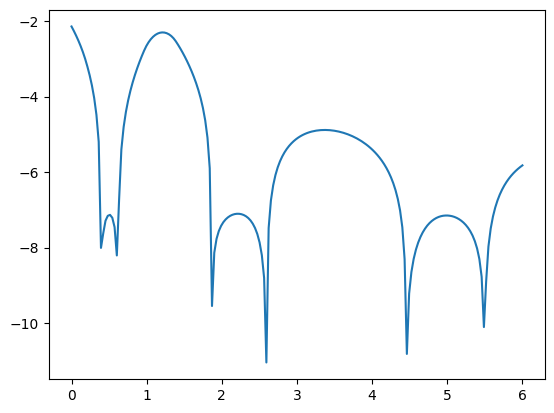

In [149]:
plt.plot(E_vals,np.log(np.abs(t_vals)))